# Lance Regehr
## 11/9/2025
### Homework 4

In [1]:
! pip install --user --upgrade selenium

In [2]:
! pip install --user --upgrade webdriver_manager

In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By # used to import different ways to access data in the XML or HTML file
from selenium.webdriver.chrome.service import Service # no longer need to download a driver file, use service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException

from webdriver_manager.chrome import ChromeDriverManager # used to manage the Chrome driver to emulate a Chrome web browser

import time
import random

In [4]:
#Firefox Template if above isn't working:
#options = webdriver.FirefoxOptions()
#driver = webdriver.Firefox(options=options)

# Gather each Game from PFR

In [5]:
browser = webdriver.Chrome() 
browser.maximize_window()

page_counter = 1

# Create empty lists to hold the data
game = []
link = []

  # There are 24 pages to scrape

    # Create the URL for each page
url = 'https://www.pro-football-reference.com/boxscores/game-scores.htm'
    
browser.get(url)

wait = WebDriverWait(browser, 10)

last_game_sorter = wait.until(
    EC.element_to_be_clickable(
        (By.CSS_SELECTOR, 'th[data-stat="last_game"]')
    )
)
last_game_sorter.click()
      # get the total height of the page
total_height = browser.execute_script("return document.body.scrollHeight")
    
    # number of steps to scroll (you can adjust this number)
scroll_steps = random.randint(3, 10) # randomize how many scroll steps we will use
    
    # calculate the height to scroll on each step
scroll_increment = total_height // scroll_steps

total_wait_time = random.randint(2,20)

    # calculate the total time available for scrolling each step
time_per_step = total_wait_time / scroll_steps
    
    # random scrolling across time
for step in range(scroll_steps):
        # scroll by the increment (dividing total height by number of steps)
    browser.execute_script(f"window.scrollBy(0, {scroll_increment});")
        
        # random wait time between scrolls to simulate varying speed
    random_wait = random.uniform(0.5 * time_per_step, 1.5 * time_per_step)  # randomize the wait within a range
    time.sleep(random_wait)
        
    # final scroll to make sure you are at the very bottom (in case it didn't exactly match)
browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#browser.execute_script("arguments[0].click();", last_game_sorter)
games = browser.find_elements(By.CSS_SELECTOR, 'td[data-stat="last_game"]') [:250]
# Find link

for g in games:
        game.append(g.text)
        l = g.find_element(By.TAG_NAME, "a").get_attribute("href")
        link.append(l)


        

    
print(game)
print(link)

    

['Los Angeles Chargers vs. Philadelphia Eagles, December 8, 2025', 'Denver Broncos vs. Las Vegas Raiders, December 7, 2025', 'Houston Texans vs. Kansas City Chiefs, December 7, 2025', 'New Orleans Saints vs. Tampa Bay Buccaneers, December 7, 2025', 'Green Bay Packers vs. Chicago Bears, December 7, 2025', 'Miami Dolphins vs. New York Jets, December 7, 2025', 'Minnesota Vikings vs. Washington Commanders, December 7, 2025', 'Los Angeles Rams vs. Arizona Cardinals, December 7, 2025', 'Pittsburgh Steelers vs. Baltimore Ravens, December 7, 2025', 'Tennessee Titans vs. Cleveland Browns, December 7, 2025', 'Seattle Seahawks vs. Atlanta Falcons, December 7, 2025', 'Jacksonville Jaguars vs. Indianapolis Colts, December 7, 2025', 'Buffalo Bills vs. Cincinnati Bengals, December 7, 2025', 'Detroit Lions vs. Dallas Cowboys, December 4, 2025', 'New England Patriots vs. New York Giants, December 1, 2025', 'Tampa Bay Buccaneers vs. Arizona Cardinals, November 30, 2025', 'New York Jets vs. Atlanta Falco

# Scrape each Game 
## Gather total pass yrds, rush yrds, and field goal percentage

In [6]:

stadium = []
date = []
start = []
roof = []

pass_yrds = []

rush_yrds = []

fgp = []
for l in link:
    pass_yrds_all = []
    rush_yrds_all = []
    fga_all = []
    fgm_all = []
    url = l

    
    try:
        browser.get(url)
    except Exception as e:
        print("Page load timeout, skipping:", url)
        continue
      # get the total height of the page
    total_height = browser.execute_script("return document.body.scrollHeight")
    
    # number of steps to scroll (you can adjust this number)
    scroll_steps = random.randint(3, 10) # randomize how many scroll steps we will use
    
    # calculate the height to scroll on each step
    scroll_increment = total_height // scroll_steps

    total_wait_time = random.randint(2,20)

    # calculate the total time available for scrolling each step
    time_per_step = total_wait_time / scroll_steps
    
    # random scrolling across time
    for step in range(scroll_steps):
        # scroll by the increment (dividing total height by number of steps)
        browser.execute_script(f"window.scrollBy(0, {scroll_increment});")
        
        # random wait time between scrolls to simulate varying speed
        random_wait = random.uniform(0.5 * time_per_step, 1.5 * time_per_step)  # randomize the wait within a range
        time.sleep(random_wait)
        
    # final scroll to make sure you are at the very bottom (in case it didn't exactly match)
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    scorebox = browser.find_element(By.CLASS_NAME, 'scorebox_meta')
    stadium_link = scorebox.find_element(By.TAG_NAME, 'a').get_attribute('href')
    stadium.append(stadium_link)

    date_element = scorebox.find_element(By.TAG_NAME, 'div')
    date.append(date_element.text)

    start_time = browser.find_element(
    By.CSS_SELECTOR, ".scorebox_meta div:nth-child(2)"
).text
    start.append(start_time)

    game_info_table = browser.find_element(
    By.XPATH, "//caption[contains(text(), 'Game Info Table')]/parent::table"
)
    roof_row = game_info_table.find_element(
    By.XPATH,
    ".//tr[th[@data-stat='info' and normalize-space()='Roof']]"
)
    roof_elem = roof_row.find_element(By.CSS_SELECTOR, "td[data-stat='stat']").text
    roof.append(roof_elem)

    table = browser.find_element(
    By.XPATH, "//caption[contains(text(), 'Passing, Rushing')]/parent::table"
)

    pass_elements = table.find_elements(By.CSS_SELECTOR, 'td[data-stat="pass_yds"]')
    for el in pass_elements:
        pass_yrds_all.append(int(el.text))
    
    pass_yrds.append(sum(pass_yrds_all))

    rush_elements = table.find_elements(By.CSS_SELECTOR, 'td[data-stat="rush_yds"]' )
    for el in rush_elements:
        rush_yrds_all.append(int(el.text))
    
    rush_yrds.append(sum(rush_yrds_all))

    fga_elements = browser.find_elements(By.CSS_SELECTOR, 'td[data-stat="fga"]' )
    for el in fga_elements:
        try:
            fga_all.append(int(el.text))
        except:
            continue
    

    fgm_elements = browser.find_elements(By.CSS_SELECTOR, 'td[data-stat="fgm"]' )
    for el in fgm_elements:
        try: 
            fgm_all.append(int(el.text))
        except:
            continue
    if (sum(fga_all) == 0):
        fgp.append(pd.NA)
    else:
        fgp.append(sum(fgm_all)/sum(fga_all))
print(pass_yrds)
print(rush_yrds)
print(fgp)
    
        





    

Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509210sfo.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509210min.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509210sea.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509210nyg.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509210phi.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509180buf.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509150htx.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509140pit.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509140nyj.htm
Page load timeout, skipping: https://www.pro-football-reference.com/boxscores/202509140mia.htm
Page load timeout, skipping: https://www.pro-footb

# Clean up the date data, create a timestamp for each game

In [7]:
print(rush_yrds_all)
print(fgm_all)
print(fga_all)
print(stadium)
print(roof)
print(start_time)
start_time = [s.split(' ')[-1] for s in start]
from datetime import datetime


dt = [datetime.strptime(d, "%A %b %d, %Y") for d in date]

# make "YYYY-MM-DD 4:25pm"
time_stamp = [
    f"{dt[i].strftime('%Y-%m-%d')} {start_time[i]}"
    for i in range(len(start_time))
]

# now parse the timestamp into full datetime objects
f_date = [
    datetime.strptime(ts, "%Y-%m-%d %I:%M%p")
    for ts in time_stamp
]

print(f_date)

iso_times = [d.strftime("%Y-%m-%dT%H:%M") for d in f_date]

iso_times_final = [datetime.fromisoformat(t) for t in iso_times]

print(iso_times_final)


[]
[]
[]
['https://www.pro-football-reference.com/stadiums/LAX96.htm', 'https://www.pro-football-reference.com/stadiums/VEG00.htm', 'https://www.pro-football-reference.com/stadiums/KAN00.htm', 'https://www.pro-football-reference.com/stadiums/TAM00.htm', 'https://www.pro-football-reference.com/stadiums/GNB00.htm', 'https://www.pro-football-reference.com/stadiums/NYC01.htm', 'https://www.pro-football-reference.com/stadiums/MIN01.htm', 'https://www.pro-football-reference.com/stadiums/PHO00.htm', 'https://www.pro-football-reference.com/stadiums/BAL00.htm', 'https://www.pro-football-reference.com/stadiums/CLE00.htm', 'https://www.pro-football-reference.com/stadiums/ATL97.htm', 'https://www.pro-football-reference.com/stadiums/JAX00.htm', 'https://www.pro-football-reference.com/stadiums/BUF00.htm', 'https://www.pro-football-reference.com/stadiums/DET00.htm', 'https://www.pro-football-reference.com/stadiums/BOS00.htm', 'https://www.pro-football-reference.com/stadiums/TAM00.htm', 'https://www.p

# Scrape each Stadium
## Gather roof type and coordinates

In [17]:
browser = webdriver.Chrome() 
browser.maximize_window()
address = []
for l in stadium:
    
    url = l
    
    browser.get(url)
      # get the total height of the page
    total_height = browser.execute_script("return document.body.scrollHeight")
    
    # number of steps to scroll (you can adjust this number)
    scroll_steps = random.randint(3, 10) # randomize how many scroll steps we will use
    
    # calculate the height to scroll on each step
    scroll_increment = total_height // scroll_steps

    total_wait_time = random.randint(2,20)

    # calculate the total time available for scrolling each step
    time_per_step = total_wait_time / scroll_steps
    
    # random scrolling across time
    for step in range(scroll_steps):
        # scroll by the increment (dividing total height by number of steps)
        browser.execute_script(f"window.scrollBy(0, {scroll_increment});")
        
        # random wait time between scrolls to simulate varying speed
        random_wait = random.uniform(0.5 * time_per_step, 1.5 * time_per_step)  # randomize the wait within a range
        time.sleep(random_wait)
        
    # final scroll to make sure you are at the very bottom (in case it didn't exactly match)
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    address_element = browser.find_element(
    By.CSS_SELECTOR, "#meta > div > p"
)
    address.append(address_element.text)

In [ ]:
print(address)

['3333 Al Davis Way, Las Vegas, NV 89118', '1 Arrowhead Drive, Kansas City, MO 64129', '4201 N. Dale Mabry Highway, Tampa, FL 33607', '1265 Lombardi Avenue, Green Bay, WI 54304', 'MetLife Sports Complex, State Highway 120, East Rutherford, New Jersey 07073', '900 South 5th Street Minneapolis, MN 55415', '1 Cardinals Drive, Glendale, AZ 85305', '1101 Russell Street, Baltimore, MD 21230', '100 Alfred Lerner Way, Cleveland OH 44114', '35 Northside Dr NW, Atlanta, GA 30313', '1 Stadium Place, Jacksonville, FL 32202', '1 Bills Drive, Orchard Park, NY 14127', '2000 Brush St., Detroit, MI 48226', '1 Patriot Place, Foxborough MA 02035', '4201 N. Dale Mabry Highway, Tampa, FL 33607', 'MetLife Sports Complex, State Highway 120, East Rutherford, New Jersey 07073', '2269 Dan Marino Blvd Opa-Locka, FL 33056', '3883 W Century Blvd, Inglewood, CA 90303', '800 South Mint St., Charlotte, NC 28202', '500 South Capitol Avenue, Indianapolis, IN 46225', '100 Art Rooney Ave., Pittsburgh, PA 15212', '800 Occ

# Gather stadium coordinates from GeoApify

In [18]:
import requests
import time

API_KEY = '5d77ee2eeee84f988e16bcaf16d1185d'  # your Geoapify API key

def get_coordinates(address):
    url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        "text": address,
        "apiKey": API_KEY
    }

    r = requests.get(url, params=params).json()

    features = r.get("features")
    if not features:
        print("NO RESULTS FOR:", address)
        return (None, None)

    lon, lat = features[0]["geometry"]["coordinates"]
    return (lat, lon)


coordinates = []

for addr in address:
    lat, lon = get_coordinates(addr)
    coordinates.append([lat, lon])
    time.sleep(0.2)

for item in coordinates:
    print(item)


[33.94553883673469, -118.34148628571428]
[36.09073585, -115.18333029577104]
[39.04893575, -94.48399931837685]
[27.977899, -82.505394]
[44.5009705, -88.06196813258998]
[40.811611, -74.067604]
[44.9722285408926, -93.25752253022225]
[33.52779565, -112.26267190264335]
[39.2779664, -76.62380930835468]
[41.5060559, -81.69971184525946]
[33.7555131, -84.4025146]
[30.322138, -81.63796]
[42.7737131, -78.78690321060253]
[42.339812, -83.045511]
[42.09088785, -71.2641730880664]
[27.977899, -82.505394]
[40.811611, -74.067604]
[25.9023168, -80.2503271]
[33.94553883673469, -118.34148628571428]
[35.225773950000004, -80.85282763498408]
[39.7600749, -86.16379684121654]
[40.446784, -80.015779]
[47.5953459, -122.33164431196111]
[38.907737, -76.864434]
[36.166441, -86.771327]
[41.5060559, -81.69971184525946]
[39.90442156434831, -75.16669127212431]
[42.339812, -83.045511]
[39.2779664, -76.62380930835468]
[37.4029867, -121.96964890125994]
[39.04893575, -94.48399931837685]
[32.74852787755102, -97.0972375714285

# Gather game-time weather data from Open-Mateo weather API

In [19]:
import requests
import time
from datetime import datetime, timedelta

prec = []
temp = []
wind = []

for i in range(len(iso_times_final)):

    # 1. Coordinates
    lat, lon = coordinates[i]

    # 2. Time window (start = kickoff)
    start_dt = iso_times_final[i]
    end_dt = start_dt + timedelta(hours=3)

    # 3. Weather API call
    def get_weather(lat, lon, date):
        url = "https://archive-api.open-meteo.com/v1/archive"

        params = {
            "latitude": lat,
            "longitude": lon,
            "start_date": date.strftime("%Y-%m-%d"),
            "end_date": date.strftime("%Y-%m-%d"),
            "hourly": "temperature_2m,precipitation,wind_speed_10m"
        }

        r = requests.get(url, params=params).json()
        hourly = r.get("hourly")

        if not hourly:
            print("NO HOURLY DATA FOR:", lat, lon)
            return None

        return hourly

    # Call API once
    hourly = get_weather(lat, lon, start_dt)
    if hourly is None:
        wind.append(None)
        temp.append(None)
        prec.append(0)
        continue

    # 4. Extract times + values
    times = [datetime.fromisoformat(t) for t in hourly["time"]]
    wind_values = hourly["wind_speed_10m"]
    temp_values = hourly["temperature_2m"]
    prec_values = hourly["precipitation"]


    # 5. Filter into the 3-hour window
    window_wind = [w for t, w in zip(times, wind_values) if start_dt <= t <= end_dt]
    window_temp = [v for t, v in zip(times, temp_values) if start_dt <= t <= end_dt]
    window_prec = [p for t, p in zip(times, prec_values) if start_dt <= t <= end_dt]

    # 6. Compute averages / sum
    avg_wind = sum(window_wind) / len(window_wind) if window_wind else None
    avg_temp = sum(window_temp) / len(window_temp) if window_temp else None
    total_prec = sum(window_prec) if window_prec else 0
    print
    wind.append(avg_wind)
    temp.append(avg_temp)
    prec.append(total_prec)

    time.sleep(0.2)   # avoid rate limits

print("PREC:", prec)
print("TEMP:", temp)
print("WIND:", wind)



PREC: [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6000000000000001, 0.0, 5.2, 2.0, 0.0, 0.0, 0.0, 0.3, 0.9, 0.0, 0.1, 0.0, 0.8999999999999999, 0.0, 0.2, 0.4, 2.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30000000000000004, 1.2, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6, 0.0, 0.0, 0.1, 0.0, 7.6, 2.0, 0.0, 0.0, 0.0, 0.0, 0.8999999999999999, 0.0, 0.0, 0.0, 0.0, 0.1, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 2.1]
TEMP: [21.599999999999998, 13.199999999999998, -1.5333333333333332, 19.925, -10.133333333333335, 2.625, -18.675, 14.6, 1.5, 0.475, 3.175, 14.575000000000001, -0.7000000000000001, -6.266666666666667, 1.5, 21.300000000000004, 3.05, 23.475, 13.766666666666666, 4.7, -3.2, 5.766666666666666,

In [25]:
print(len(game[:129]))
print(len(pass_yrds))
print(len(prec))

129
129
129


In [ ]:


all_model_data = pd.DataFrame({
    "game": game[:129],
    "roof": roof,
    "date": f_date,
    "pass_yrds": pass_yrds,
    "rush_yrds": rush_yrds,
    "fgp": fgp,
    "tot_precipitation": prec,
    "avg_temperature": temp,
    "avg_wind_speed": wind
})
display(all_model_data)
all_model_data.to_csv('Data_Wrangling_Project_Data')


,game,roof,date,pass_yrds,rush_yrds,fgp,tot_precipitation,avg_temperature,avg_wind_speed
0,"Los Angeles Chargers vs. Philadelphia Eagles, ...",dome,2025-12-08 20:15:00,379,303,0.9,0.0,21.600000,3.766667
1,"Denver Broncos vs. Las Vegas Raiders, December...",dome,2025-12-07 16:05:00,425,192,1.0,0.0,13.200000,1.133333
2,"Houston Texans vs. Kansas City Chiefs, Decembe...",outdoors,2025-12-07 20:20:00,363,208,0.75,0.0,-1.533333,14.066667
3,"New Orleans Saints vs. Tampa Bay Buccaneers, D...",outdoors,2025-12-07 13:00:00,266,318,0.75,0.8,19.925000,10.575000
4,"Green Bay Packers vs. Chicago Bears, December ...",outdoors,2025-12-07 16:25:00,420,255,1.0,0.0,-10.133333,11.366667
...,...,...,...,...,...,...,...,...,...
124,"Jacksonville Jaguars vs. Houston Texans, Septe...",outdoors,2025-09-21 13:00:00,426,173,0.5,0.0,27.300000,12.950000
125,"Pittsburgh Steelers vs. New England Patriots, ...",outdoors,2025-09-21 13:00:00,407,183,<NA>,0.0,15.275000,7.925000
126,"Carolina Panthers vs. Atlanta Falcons, Septemb...",outdoors,2025-09-21 13:00:00,322,241,0.6,0.0,24.050000,6.825000
127,"Washington Commanders vs. Las Vegas Raiders, S...",outdoors,2025-09-21 13:00:00,496,294,0.75,0.7,20.250000,13.200000


# Run Models

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [167]:
all_model_data = pd.read_csv('Data_Wrangling_Project_Data')

In [168]:

# --- Filter dataset ---
model_data = all_model_data.loc[all_model_data['roof'] == 'outdoors']


# --- Define X and y ---
x = model_data[['tot_precipitation', 'avg_wind_speed', 'avg_temperature']]
y = model_data['rush_yrds'] / (model_data['pass_yrds'] + model_data['rush_yrds'])  # Series (1D)

# --- Add constant for p-values (statsmodels requires it) ---
X_sm = sm.add_constant(x)

# --- Fit statsmodels regression (for p-values) ---
model_sm = sm.OLS(y, X_sm).fit()

print("===== Statsmodels OLS Summary (with p-values) =====")
display(model_sm.summary())


===== Statsmodels OLS Summary (with p-values) =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8217
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.485
Time:                        11:39:42   Log-Likelihood:                 99.985
No. Observations:                  89   AIC:                            -192.0
Df Residuals:                      85   BIC:                            -182.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3657      0.023     16.170      0.000       0.321       0.411
tot_precipitation    -0.0010      0.008     -0.117      0.907      -0.018       0.016
avg_wind_speed        0.0011      0.001      0.886      0.378      -0.001       0.004
avg_temperature      -0.0011      0.001     -1.105      0.272      -0.003       0.001
==============================================================================
Omnibus:                        1.755   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.722
Skew:                           0.327   Prob(JB):                        0.423
Kurtosis:                       2.806   Cond. No.                         51.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Avg. Wind Speed vs Rush Yards')

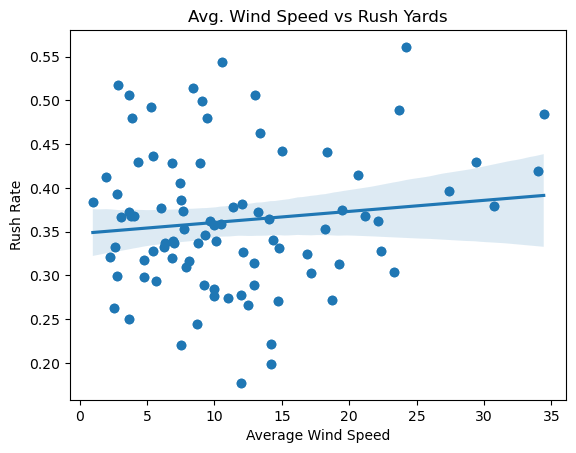

In [169]:
x = model_data['avg_wind_speed']
y = model_data['rush_yrds'] / (model_data['pass_yrds'] + model_data['rush_yrds']) 
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Average Wind Speed')
plt.ylabel('Rush Rate')
plt.title('Avg. Wind Speed vs Rush Yards')

In [170]:

# --- Filter dataset ---
model_data = all_model_data.loc[all_model_data['roof'] == 'outdoors']


# --- Define X and y ---
x = model_data[['tot_precipitation', 'avg_wind_speed', 'avg_temperature']]
y = model_data['rush_yrds']  # Series (1D)

# --- Add constant for p-values (statsmodels requires it) ---
X_sm = sm.add_constant(x)

# --- Fit statsmodels regression (for p-values) ---
model_sm = sm.OLS(y, X_sm).fit()

print("===== Statsmodels OLS Summary (with p-values) =====")
display(model_sm.summary())



===== Statsmodels OLS Summary (with p-values) =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rush_yrds   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5897
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.623
Time:                        11:39:42   Log-Likelihood:                -491.87
No. Observations:                  89   AIC:                             991.7
Df Residuals:                      85   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               266.8042     17.479     15.264      0.000     232.050     301.558
tot_precipitation    -0.1407      6.480     -0.022      0.983     -13.024      12.743
avg_wind_speed       -1.0455      0.945     -1.106      0.272      -2.924       0.834
avg_temperature      -0.6519      0.790     -0.825      0.412      -2.223       0.919
==============================================================================
Omnibus:                       10.554   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.767
Skew:                           0.729   Prob(JB):                      0.00459
Kurtosis:                       3.880   Cond. No.                         51.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Avg. Wind Speed vs Rush Yards')

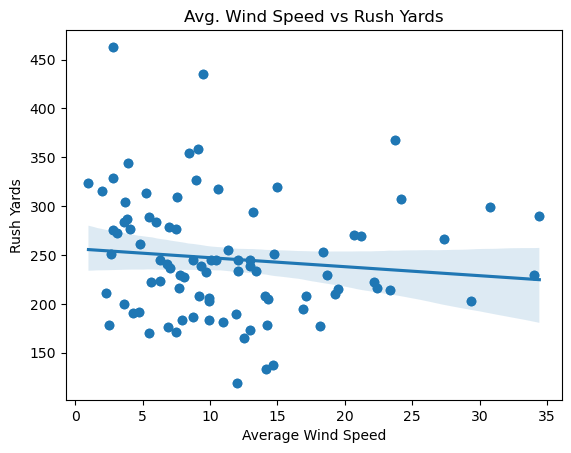

In [171]:
x = model_data['avg_wind_speed']
y = model_data['rush_yrds']
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Average Wind Speed')
plt.ylabel('Rush Yards')
plt.title('Avg. Wind Speed vs Rush Yards')

Text(0.5, 1.0, 'Total Precipitation vs Rush Yards')

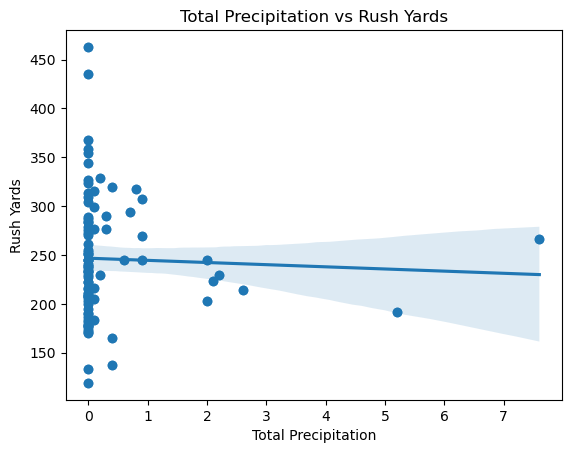

In [172]:

x = model_data['tot_precipitation']
y = model_data['rush_yrds']
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Total Precipitation')
plt.ylabel('Rush Yards')
plt.title('Total Precipitation vs Rush Yards')

In [173]:
fgp_model_data = model_data.loc[model_data['fgp'].notnull()]
x = fgp_model_data[['tot_precipitation', 'avg_wind_speed', 'avg_temperature'] ]
y = fgp_model_data['fgp']

# --- Add constant for p-values (statsmodels requires it) ---
X_sm = sm.add_constant(x)

# --- Fit statsmodels regression (for p-values) ---
model_sm = sm.OLS(y, X_sm).fit()

print("===== Statsmodels OLS Summary (with p-values) =====")
display(model_sm.summary())


===== Statsmodels OLS Summary (with p-values) =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fgp   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7883
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.504
Time:                        11:39:43   Log-Likelihood:                 16.098
No. Observations:                  85   AIC:                            -24.20
Df Residuals:                      81   BIC:                            -14.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9075      0.058     15.633      0.000       0.792       1.023
tot_precipitation     0.0119      0.021      0.555      0.580      -0.031       0.055
avg_wind_speed       -0.0008      0.003     -0.239      0.812      -0.007       0.006
avg_temperature      -0.0037      0.003     -1.429      0.157      -0.009       0.001
==============================================================================
Omnibus:                       45.681   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.026
Skew:                          -1.846   Prob(JB):                     3.53e-29
Kurtosis:                       7.833   Cond. No.                         50.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Avg. Wind Speed vs Field Goal%')

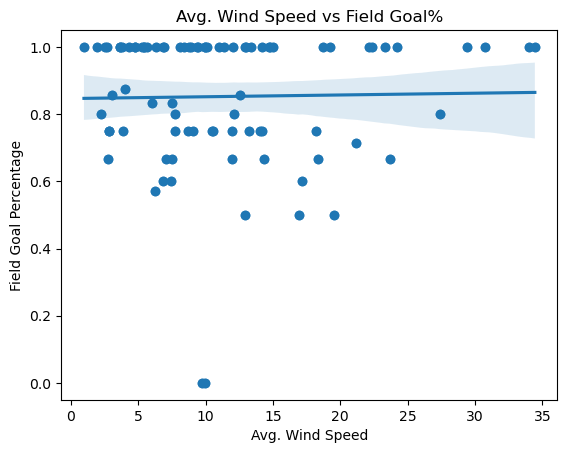

In [174]:
x = fgp_model_data['avg_wind_speed']
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Avg. Wind Speed')
plt.ylabel('Field Goal Percentage')
plt.title('Avg. Wind Speed vs Field Goal%')

In [177]:
# Make dummy variables for roof
all_model_data['roof_dummy'] = all_model_data['roof'].apply(lambda x: 1 if x == 'outdoors' else 0)
x = all_model_data[['roof_dummy' ] ]
y = all_model_data['pass_yrds']

# --- Add constant for p-values (statsmodels requires it) ---
X_sm = sm.add_constant(x)

# --- Fit statsmodels regression (for p-values) ---
model_sm = sm.OLS(y, X_sm).fit()

print("===== Statsmodels OLS Summary (with p-values) =====")
display(model_sm.summary())


===== Statsmodels OLS Summary (with p-values) =====


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pass_yrds   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     6.589
Date:                Fri, 12 Dec 2025   Prob (F-statistic):             0.0114
Time:                        11:39:57   Log-Likelihood:                -782.20
No. Observations:                 129   AIC:                             1568.
Df Residuals:                     127   BIC:                             1574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        489.9250     16.577     29.554      0.000     457.122     522.728
roof_dummy   -51.2284     19.958     -2.567      0.011     -90.721     -11.736
==============================================================================
Omnibus:                        4.424   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.859
Skew:                           0.387   Prob(JB):                        0.145
Kurtosis:                       3.346   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Avg. Temp vs Total Pass Yards')

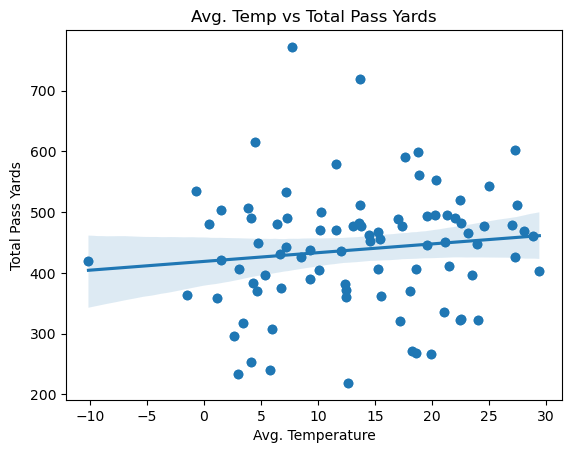

In [179]:
x = model_data['avg_temperature']
y = model_data['pass_yrds']
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Avg. Temperature')
plt.ylabel('Total Pass Yards')
plt.title('Avg. Temp vs Total Pass Yards')

Text(0.5, 1.0, 'Avg. Wind Speed vs Total Pass Yards')

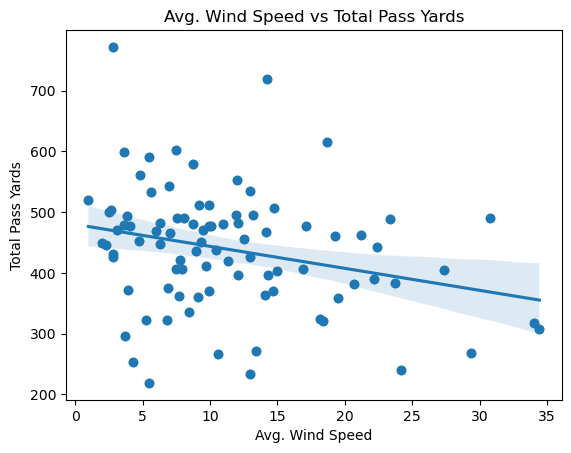

In [ ]:
x = model_data['avg_wind_speed']
plt.scatter(x, y)
sns.regplot(x=x, y=y)
plt.xlabel('Avg. Wind Speed')
plt.ylabel('Total Pass Yards')
plt.title('Avg. Wind Speed vs Total Pass Yards')

In [ ]:

df_kick = all_model_data.dropna(subset=['fgp'])
domes = df_kick[df_kick['roof'] != 'outdoors']['fgp']
outdoors = df_kick[df_kick['roof'] == 'outdoors']['fgp']

print("Indoor mean:", domes.mean())
print("Outdoors mean:", outdoors.mean())

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(domes, outdoors, equal_var=False)

print("t-stat:", t_stat)
print("p-value:", p_value)

Indoor mean: 0.8734126984126984
Outdoors mean: 0.8524509803921568
t-stat: 0.6107032211437871
p-value: 0.5428904469015066


In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in FG% between domes and outdoors.")
else:
    print("Fail to reject the null hypothesis: No significant difference in FG% between domes and outdoors.")

Fail to reject the null hypothesis: No significant difference in FG% between domes and outdoors.


/var/folders/w7/bd5y3dn511z1h607k3c4v7mc0000gn/T/ipykernel_89181/2652371021.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([domes.dropna(), outdoors.dropna()], labels=['Indoors', 'Outdoors'])


Text(0.5, 1.0, 'FG% Indoors vs Outdoors')

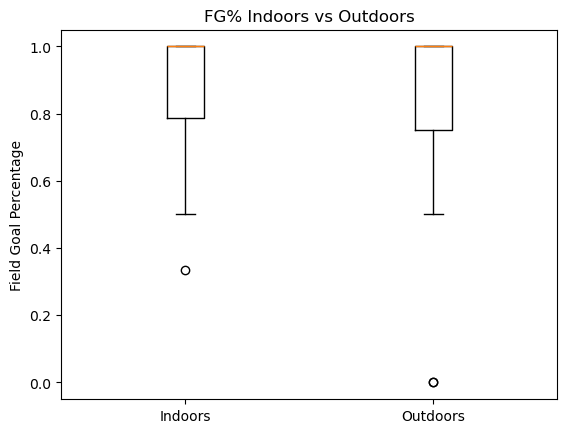

In [ ]:
plt.boxplot([domes.dropna(), outdoors.dropna()], labels=['Indoors', 'Outdoors'])
plt.ylabel('Field Goal Percentage')
plt.title('FG% Indoors vs Outdoors')   

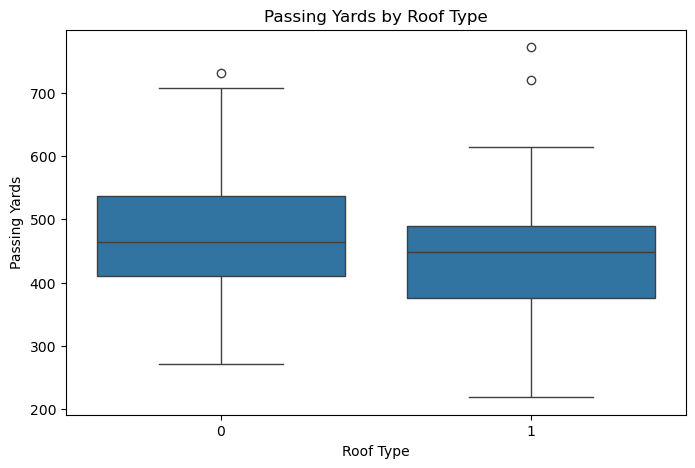

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=all_model_data, x='roof_dummy', y='pass_yrds')

plt.title('Passing Yards by Roof Type')
plt.xlabel('Roof Type')
plt.ylabel('Passing Yards')

plt.show()

In [ ]:
# Find game that has max pass yards
all_model_data.loc[all_model_data['pass_yrds'].idxmax()]



Unnamed: 0                                                          69
game                 Chicago Bears vs. Cincinnati Bengals, November...
roof                                                          outdoors
date                                               2025-11-02 13:00:00
pass_yrds                                                          772
rush_yrds                                                          329
fgp                                                           0.666667
tot_precipitation                                                  0.2
avg_temperature                                                   7.75
avg_wind_speed                                                   2.775
roof_dummy                                                           1
Name: 69, dtype: object